# Mini Project 1

**2025 Introduction to Quantitative Methods in Finance**

**The Erdös Institute**

**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

# <span style="color:blue;">Introduction</span> #

To construct our portfolios, we first consider stock selection, and then we will determine the weights.

We interpret high risk and low risk to refer to volatility. Each of our portfolios of stocks will possess a covariance matrix Cov(X). To measure volatility, we use the inner product $w^T$ Cov(X) $w$, where $w$ represents a vector of weights corresponding to the proportions of capital allocated to each stock.

We want to impose some conditions on our portfolios. We want both portfolios to have 10 stocks. This number was chosen to be greater than 1 or 2 to diversify the portfolio. The number is still small enough that we can list the tickers explicitly by hand.

In selecting our stocks and weights, we base our selection on the associated risk, as measured by the inner product $w^T$ Cov(X) $w$. For the higher risk portfolio, we will choose stocks X and weights $w$ so that $w^T$ Cov(X) $w$ is large. For the lower risk portfolio, we will choose stocks X and weights $w$ so that $w^T$ Cov(X) $w$ is small.

In [1]:
# Import packages
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pandas as pd
from scipy.optimize import minimize

# <span style="color:blue;"> High Risk Profile </span> #

## Stock Selection ##

We consider stocks in the technology sector. The technology sector typically shows economic growth, so we hope our portfolio will be profitable. However, investing in stocks in the same sector tends to lead to higher risk than investing in stocks in multiple different sectors.

Examining the stocks in the technology sector, we first select the 20 companies with the largest market caps.

In [168]:
# 20 stocks from the technology sector with the largest market caps (https://stockanalysis.com/stocks/sector/technology/)
# (1) Microsoft Corporation, (2) NVIDIA Corporation, (3) Apple Inc., (4) Broadcom Inc.,
# (5) Taiwan Semiconductor Manufacturing Company Limited, (6) Oracle Corporation, (7) SAP SE, (8) ASML Holding N.V.,
# (9) Palantir Technologies Inc., (10) Salesforce, Inc., (11) Cisco Systems, Inc., (12) International Business Machines Corporation,
# (13) ServiceNow, Inc., (14) Intuit Inc., (15) Accenture plc, (16) Uber Technologies, Inc.,
# (17) Advanced Micro Devices, Inc., (18) Adobe Inc., (19) Texas Instruments Incorporated, (20) QUALCOMM Incorporated
tickers = ['MSFT', 'NVDA', 'AAPL', 'AVGO', 'TSM', 'ORCL', 'SAP', 'ASML', 'PLTR', 'CRM', 
           'CSCO', 'IBM', 'NOW', 'INTU', 'ACN', 'UBER', 'AMD', 'ADBE', 'TXN', 'QCOM']

# Set the dates to be the past year
start_date = dt.datetime.today()-dt.timedelta(days = 365)
end_date = dt.datetime.today()

# Download the stock data
stock = yf.download(tickers, start=start_date, end=end_date)

# Show the head of the stock data
stock.head()

[*********************100%***********************]  20 of 20 completed


Price            Close                                                  \
Ticker            AAPL         ACN        ADBE         AMD        ASML   
Date                                                                     
2024-05-29  189.404205  288.637543  477.600006  165.139999  951.145386   
2024-05-30  190.399567  279.824249  445.869995  166.750000  959.327515   
2024-05-31  191.355103  277.358093  444.760010  166.899994  953.598083   
2024-06-03  193.126801  276.837402  439.019989  163.550003  958.691956   
2024-06-04  193.445328  283.027283  448.369995  159.990005  944.125122   

Price                                                                  ...  \
Ticker            AVGO         CRM       CSCO         IBM        INTU  ...   
Date                                                                   ...   
2024-05-29  137.387405  270.039856  44.736500  162.140350  594.423523  ...   
2024-05-30  134.760544  216.741714  44.775330  160.762070  559.341125  ...   
2024-05-31  131.250427  233.076141  45.144249  161.946213  572.724304  ...   
2024-06-03  130.593475  235.243469  45.289879  160.422348  563.563721  ...   
2024-06-04  131.474701  233.493698  46.037430  160.936768  568.372559  ...   

Price         Volume                                                    \
Ticker          MSFT      NOW       NVDA      ORCL      PLTR      QCOM   
Date                                                                     
2024-05-29  15517100   877700  557442000   4735100  24834200  12552500   
2024-05-30  28424800  5098200  487350000  10851600  47583100  12263900   
2024-05-31  47995300  4301800  613263000  12755600  44416100  15064900   
2024-06-03  17484700  1907700  438392000   7256300  33876100  12419500   
2024-06-04  14348900  2491200  403324000   7368000  41974000   6629100   

Price                                             
Ticker          SAP       TSM      TXN      UBER  
Date                                              
2024-05-29   747400  15780000  5607800  16987900  
2024-05-30  1950600   9711000  5213500  12692500  
2024-05-31   848700  13782600  9137300  17322400  
2024-06-03   755000  12924400  4153500  14922200  
2024-06-04   470500  10066700  7221600  12689200  

[5 rows x 100 columns]

In [169]:
# Calculate the daily returns
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

# Calculate the covariance matrix
covariance_matrix = 252*((daily_returns).cov())

# Show the covariance matrix
covariance_matrix

Ticker,AAPL,ACN,ADBE,AMD,ASML,AVGO,CRM,CSCO,IBM,INTU,MSFT,NOW,NVDA,ORCL,PLTR,QCOM,SAP,TSM,TXN,UBER
Ticker,,,,,,,,,,,,,,,,,,,,
AAPL,0.108661,0.034998,0.047253,0.095591,0.069955,0.082230,0.047747,0.037082,0.031115,0.043813,0.049535,0.060387,0.083771,0.054453,0.085411,0.080229,0.046221,0.064897,0.070331,0.049212
ACN,0.034998,0.074032,0.039353,0.049765,0.032281,0.041504,0.049346,0.031872,0.040760,0.031003,0.024306,0.049648,0.039515,0.040613,0.051615,0.039509,0.029294,0.028037,0.043194,0.023477
ADBE,0.047253,0.039353,0.142998,0.070515,0.055005,0.073520,0.076057,0.032696,0.029119,0.048924,0.040278,0.079340,0.077726,0.060196,0.083482,0.057585,0.039152,0.055004,0.046449,0.037916
AMD,0.095591,0.049765,0.070515,0.274973,0.174978,0.187503,0.085068,0.057753,0.057611,0.075405,0.072532,0.098662,0.195771,0.114581,0.175647,0.160878,0.078328,0.160192,0.127198,0.106172
ASML,0.069955,0.032281,0.055005,0.174978,0.241182,0.186831,0.065646,0.039880,0.040583,0.066715,0.061887,0.084791,0.182428,0.096205,0.129214,0.150041,0.073146,0.163667,0.106564,0.089879
AVGO,0.082230,0.041504,0.073520,0.187503,0.186831,0.389492,0.078502,0.061932,0.051041,0.079123,0.082136,0.106265,0.260814,0.152785,0.204703,0.173431,0.068325,0.214209,0.105129,0.080287
CRM,0.047747,0.049346,0.076057,0.085068,0.065646,0.078502,0.160574,0.038224,0.028160,0.067532,0.051410,0.125678,0.097067,0.075553,0.090124,0.070228,0.062375,0.064118,0.056372,0.047092
CSCO,0.037082,0.031872,0.032696,0.057753,0.039880,0.061932,0.038224,0.052924,0.031910,0.031769,0.028419,0.041213,0.065075,0.051863,0.062365,0.045457,0.028528,0.045328,0.050629,0.033643
IBM,0.031115,0.040760,0.029119,0.057611,0.040583,0.051041,0.028160,0.031910,0.076357,0.029819,0.010958,0.015731,0.044309,0.043112,0.056897,0.039121,0.028303,0.038599,0.038665,0.024760


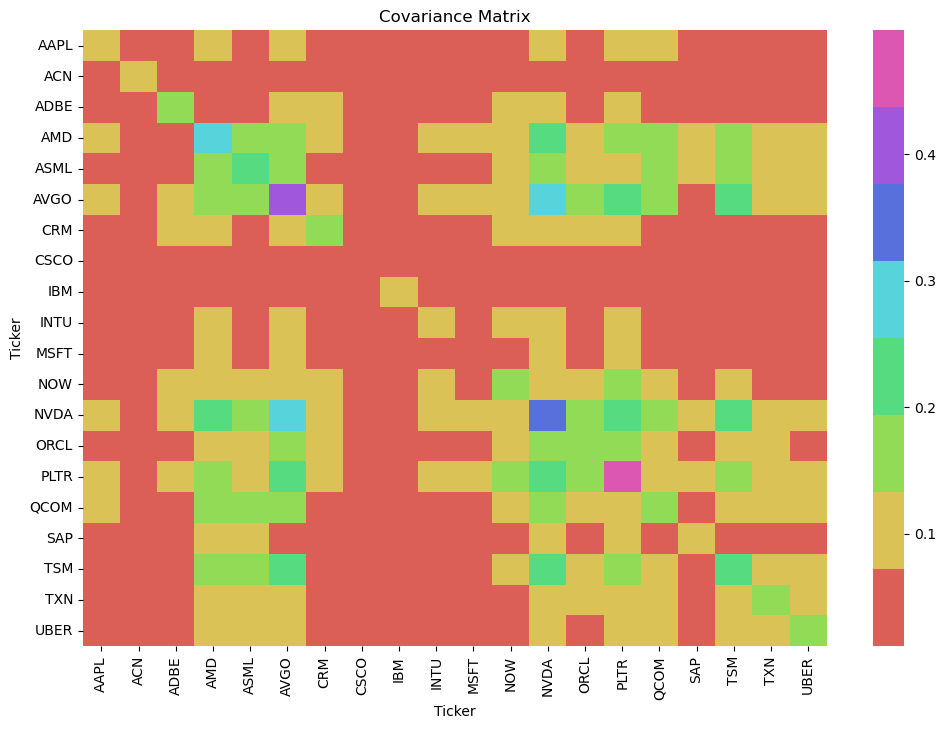

In [170]:
# Create a heatmap to visualize the covariance matrix
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix, annot=False, cmap=sns.color_palette("hls", 8), fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()

From our original 20 stocks, we now select 10 stocks for our portfolio. To do this, we visually inspect the heatmap to determine the stocks that collectively produce the highest covariances. We want those stocks that produce the greatest number of high covariances.

In [171]:
# From the heat map, we select the 10 stocks that produced the highest number of high covariances
tickers_new = ['AMD', 'ASML', 'AVGO', 'NOW', 'NVDA', 'PLTR', 'QCOM', 'TSM', 'TXN', 'UBER']

# Create a new dataframe with only the above 10 stocks
stock_new = yf.download(tickers_new, start=start_date, end=end_date)

[*********************100%***********************]  10 of 10 completed


In [172]:
# Calculate the daily returns
daily_returns_new = np.log(stock_new['Close']/stock_new['Close'].shift(1))
daily_returns_new = daily_returns_new.dropna()

# Calculate the covariance matrix
covariance_matrix_new = 252*((daily_returns_new).cov())

# Show the covariance matrix
covariance_matrix_new

Ticker,AMD,ASML,AVGO,NOW,NVDA,PLTR,QCOM,TSM,TXN,UBER
Ticker,,,,,,,,,,
AMD,0.274973,0.174978,0.187503,0.098662,0.195771,0.175647,0.160878,0.160192,0.127198,0.106172
ASML,0.174978,0.241182,0.186831,0.084791,0.182428,0.129214,0.150041,0.163667,0.106564,0.089879
AVGO,0.187503,0.186831,0.389492,0.106265,0.260814,0.204703,0.173431,0.214209,0.105129,0.080287
NOW,0.098662,0.084791,0.106265,0.188604,0.123441,0.134728,0.085861,0.086735,0.071132,0.062286
NVDA,0.195771,0.182428,0.260814,0.123441,0.350209,0.206980,0.171342,0.217240,0.112763,0.096867
PLTR,0.175647,0.129214,0.204703,0.134728,0.206980,0.498096,0.131753,0.159428,0.095636,0.131458
QCOM,0.160878,0.150041,0.173431,0.085861,0.171342,0.131753,0.190931,0.130955,0.117729,0.083523
TSM,0.160192,0.163667,0.214209,0.086735,0.217240,0.159428,0.130955,0.218247,0.090902,0.082337
TXN,0.127198,0.106564,0.105129,0.071132,0.112763,0.095636,0.117729,0.090902,0.151533,0.073761


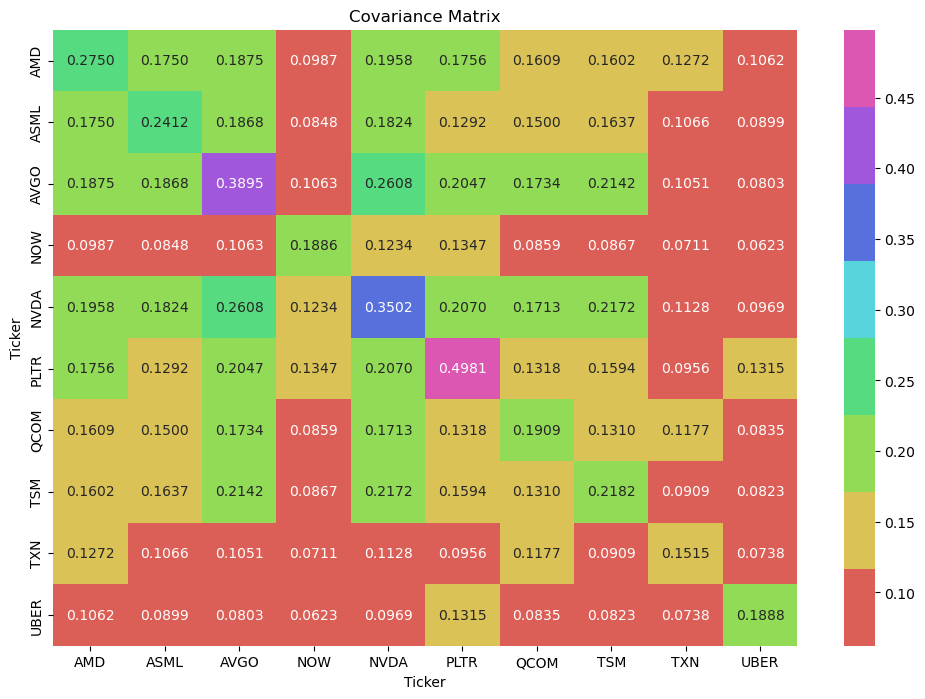

In [173]:
# Create a heatmap to visualize the covariance matrix
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix_new, annot=True, cmap=sns.color_palette("hls", 8), fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()

## Weight Selection ##

We now impose the following conditions to determine the weights of each stock in our portfolio:
- We want to invest at least 5% of capital in each index.
- We want to invest no more than 20% of capital in each index.
- We want to create the portfolio with the highest risk given these constraints.

The function $w$ &rarr; $w^T$ Cov(X<sub>1</sub>, ..., X<sub>10</sub>) $w$ is convex in $w$, so it can be minimized subject to constraints. The function $w$ &rarr; $-w^T$ Cov(X<sub>1</sub>, ..., X<sub>10</sub>) $w$ is not convex in $w$, so it does not possess a unique minimum. Thus, the original function does not possess a unique maximum. Typical solvers (e.g., minimize in scipy.optimize) are unable to compute a maximum for the original function due to the lack of convexity.

To approximate a maximum, we use Monte-Carlo methods. In particular, we take random guesses for the set of weights, and then we determine which set of weights produces the maximum from among our guesses. This method can only approximate, but not explicitly compute, a maximum.

In [174]:
# Number of assets
n_assets = len(tickers_new)

# Random guesses subject to constraints
N = 100 # number of random sets of weights
store_weights = [[0 for _ in range(n_assets)] for i in range(N)]
i = 0
while i < N:
    # Randomly select (n_assets-1) weights between 0.05 and 0.2
    weights = [0.15*np.random.random()+0.05 for _ in range(n_assets-1)]
    # Use the condition sum(weights) = 1 to determine the last weight
    weightn = 1-sum(weights)
    if 0.05 <= weightn and weightn <= 0.2:
        weights.append(weightn)
        store_weights[i] = weights
        i += 1

# Define the objective function for portfolio variance
store_weights = np.array(store_weights)
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix_new, weights)))
    return portfolio_std_dev

# Compute the standard deviation values for the random weights
store_std_dev = [0 for _ in range(N)]
for i in range(N):
    store_std_dev[i] = portfolio_volatility(store_weights[i])

# Determine which set of weights produces the largest standard deviation
max_std_dev = max(store_std_dev)
ind_max = np.argmax(store_std_dev)
weights_max = store_weights[ind_max]

# Print the weights and volatility
print("Asset Weights to Maximize Volatility:")
for ticker, weight in zip(tickers_new, weights_max):
    print(f"{ticker}: Weight = {weight:.4f}")
print(f'With these weights, the volatility is {max_std_dev}.')

Asset Weights to Maximize Volatility:
AMD: Weight = 0.1414
ASML: Weight = 0.0976
AVGO: Weight = 0.1972
NOW: Weight = 0.0562
NVDA: Weight = 0.1427
PLTR: Weight = 0.0558
QCOM: Weight = 0.0845
TSM: Weight = 0.0681
TXN: Weight = 0.1019
UBER: Weight = 0.0544
With these weights, the volatility is 0.4137185310153054.


The above list gives our high risk profile. Our portfolio consists of the stocks on the left, and the proportions of each stock in the portfolio are given by the weights.

## <span style="color:blue;"> Low Risk Profile </span> ##

## Stock Selection ##

We consider stocks across a variety of sectors. As our above portfolio was focused in the technology sector, we will select stocks from the other sectors to create the below portfolio. There are 11 sectors (https://stockanalysis.com/stocks/industry/sectors/), so omitting the technology sector, we have 10 sectors to choose stocks from. Investing in stocks in a variety of sectors tends to lead to lower risk than investing in stocks in the same sector.

We examine stocks across the following sectors:
- Healthcare,
- Financials,
- Industrials,
- Consumer Discretionary,
- Materials,
- Real Estate,
- Energy,
- Communication Services,
- Consumer Staples, and
- Utilies.

Within each sector, we consider the stocks with the 4 highest market caps. We list these below.
- Healthcare: LLY, JNJ, ABBV, NVO,
- Financials: BRK.B, JPM, V, MA,
- Industrials: GE, RTX, CAT, BA,
- Consumer Discretionary: AMZN, TSLA, HD, BABA,
- Materials: LIN, BHP, RIO, SHW,
- Real Estate: PLD, AMT, WELL, EQIX,
- Energy: XOM, CVX, SHEL, TTE,
- Communication Services: GOOGL, META, NFLX, TMUS,
- Consumer Staples: WMT, COST, PG, KO,
- Utilies: NEE, SO, CEG, and DUK.

In [16]:
# 40 stocks from a variety of sectors
tickers = ['LLY', 'JNJ', 'ABBV', 'NVO', 'BRK-B', 'JPM', 'V', 'MA', 'GE', 'RTX',
           'CAT', 'BA', 'AMZN', 'TSLA', 'HD', 'BABA', 'LIN', 'BHP', 'RIO', 'SHW',
           'PLD', 'AMT', 'WELL', 'EQIX', 'XOM', 'CVX', 'SHEL', 'TTE', 'GOOGL', 'META',
           'NFLX', 'TMUS', 'WMT', 'COST', 'PG', 'KO', 'NEE', 'SO', 'CEG', 'DUK']

# Set the dates to be the past year
start_date = dt.datetime.today()-dt.timedelta(days = 365)
end_date = dt.datetime.today()

# Download the stock data
stock = yf.download(tickers, start=start_date, end=end_date)

# Show the head of the stock data
stock.head()

[*********************100%***********************]  40 of 40 completed


Price            Close                                                 \
Ticker            ABBV         AMT        AMZN          BA       BABA   
Date                                                                    
2024-05-28  149.894699  179.103470  182.149994  175.080002  78.865974   
2024-05-29  149.363983  179.384201  182.020004  171.649994  77.378296   
2024-05-30  150.830704  184.669312  179.320007  172.750000  77.936172   
2024-05-31  155.587875  189.470444  176.440002  177.610001  76.673615   
2024-06-03  154.574692  190.661041  178.339996  184.570007  76.242981   

Price                                                                  ...  \
Ticker            BHP       BRK-B         CAT         CEG        COST  ...   
Date                                                                   ...   
2024-05-28  56.813423  403.899994  340.931915  229.383392  808.987366  ...   
2024-05-29  56.670437  404.089996  332.705536  219.273987  802.371643  ...   
2024-05-30  55.917374  408.609985  333.827332  223.465973  811.146240  ...   
2024-05-31  56.746696  414.399994  333.108978  215.807159  805.724243  ...   
2024-06-03  56.603710  414.790009  326.063477  206.876862  811.195984  ...   

Price        Volume                                                         \
Ticker         SHEL      SHW       SO     TMUS      TSLA      TTE        V   
Date                                                                         
2024-05-28  3078948  1735100  2941700  5729300  59736600   566500  6212100   
2024-05-29  3074933  1711700  4413800  6166000  54782600   737000  5469700   
2024-05-30  4123137  1149100  4237900  6210400  77784800   940500  4903100   
2024-05-31  3739175  6144800  7168000  8684300  67314600  1716100  8910000   
2024-06-03  3495760  1971300  4539700  7801600  68568900   941000  4838800   

Price                                    
Ticker         WELL       WMT       XOM  
Date                                     
2024-05-28  2738000  13349600  13978300  
2024-05-29  2075900  11538600  13902000  
2024-05-30  1672500  13053500  14692000  
2024-05-31  7068500  27632200  29037400  
2024-06-03  3030100  11578700  19589300  

[5 rows x 200 columns]

In [17]:
# Calculate the daily returns
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

# Calculate the covariance matrix
covariance_matrix = 252*((daily_returns).cov())

# Show the covariance matrix
covariance_matrix

Ticker,ABBV,AMT,AMZN,BA,BABA,BHP,BRK-B,CAT,CEG,COST,...,SHEL,SHW,SO,TMUS,TSLA,TTE,V,WELL,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,,
ABBV,0.082846,0.026481,0.013957,0.018568,0.016908,0.024036,0.020465,0.018962,-0.007398,0.013210,...,0.020582,0.018341,0.017612,0.012304,0.001523,0.015014,0.021624,0.021229,0.018746,0.020613
AMT,0.026481,0.077188,-0.021594,-0.009040,0.010313,0.008436,0.009066,-0.008501,-0.036172,0.006469,...,0.007319,0.022851,0.033460,0.016876,-0.031845,0.009654,0.008895,0.025547,0.013164,0.006604
AMZN,0.013957,-0.021594,0.120731,0.069899,0.035033,0.036358,0.022043,0.059586,0.100462,0.030410,...,0.022467,0.033479,-0.013936,0.006194,0.144186,0.018730,0.032319,0.005476,0.034934,0.017098
BA,0.018568,-0.009040,0.069899,0.152794,0.040481,0.046760,0.026761,0.052494,0.086840,0.030574,...,0.033140,0.031466,-0.006618,0.006166,0.120408,0.032711,0.035879,0.018107,0.035696,0.027244
BABA,0.016908,0.010313,0.035033,0.040481,0.208829,0.072440,0.010161,0.046931,0.043084,0.010340,...,0.033660,0.023811,0.002683,0.005018,0.064290,0.039594,0.017317,0.010534,0.013111,0.021753
BHP,0.024036,0.008436,0.036358,0.046760,0.072440,0.082109,0.017435,0.046015,0.047173,0.015806,...,0.036441,0.021237,0.003735,0.014874,0.067632,0.038983,0.019519,0.013058,0.018385,0.029994
BRK-B,0.020465,0.009066,0.022043,0.026761,0.010161,0.017435,0.039290,0.031435,0.013083,0.015220,...,0.018486,0.019412,0.012393,0.020138,0.047377,0.015070,0.027912,0.016763,0.017987,0.022632
CAT,0.018962,-0.008501,0.059586,0.052494,0.046931,0.046015,0.031435,0.094735,0.076354,0.016579,...,0.034679,0.039801,-0.004516,0.013458,0.095879,0.031290,0.029807,0.006677,0.020307,0.036471
CEG,-0.007398,-0.036172,0.100462,0.086840,0.043084,0.047173,0.013083,0.076354,0.484861,0.041377,...,0.048224,0.028016,-0.020177,0.011929,0.162783,0.040569,0.034997,0.010745,0.042634,0.024718


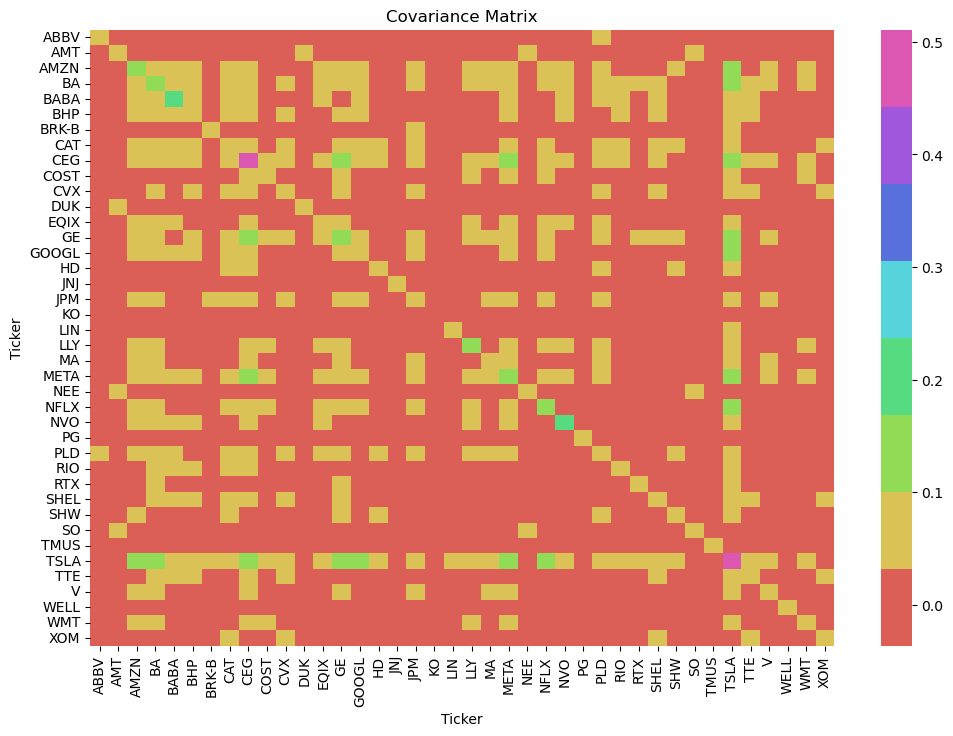

In [18]:
# Create a heatmap to visualize the covariance matrix
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix, annot=False, cmap=sns.color_palette("hls", 8), fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()

From our original 40 stocks, we now select a subset of stocks to examine further. To do this, we visually inspect the heatmap to determine the stocks that collectively produce the lowest covariances. We want those stocks that produce the smallest number of low covariances. At this stage, we form a subset of stocks for which the above heatmap produces 8 or fewer red blocks.

In [19]:
# From the heat map, we select the stocks that produced 8 or fewer blocks of low covariances
#tickers_new = ['ABBV' (2), 'AMT' (4), 'BRK-B' (3), 'COST' (8), 'DUK' (2), 'HD' (6), 'JNJ' (1), 'KO' (0), 'LIN' (2),
               #'NEE' (3), 'PG' (1), 'RIO' (7), 'RTX' (4), 'SHW' (7), 'SO' (3), 'TMUS' (1), 'WELL' (1), 'WMT' (8), 'XOM' (5)]
tickers_new = ['ABBV', 'AMT', 'BRK-B', 'COST', 'DUK', 'HD', 'JNJ', 'KO', 'LIN',
               'NEE', 'PG', 'RIO', 'RTX', 'SHW', 'SO', 'TMUS', 'WELL', 'WMT', 'XOM']

# Create a new dataframe with only the above stocks
stock_new = yf.download(tickers_new, start=start_date, end=end_date)

[*********************100%***********************]  19 of 19 completed


In [20]:
# Calculate the daily returns
daily_returns_new = np.log(stock_new['Close']/stock_new['Close'].shift(1))
daily_returns_new = daily_returns_new.dropna()

# Calculate the covariance matrix
covariance_matrix_new = 252*((daily_returns_new).cov())

# Show the covariance matrix
covariance_matrix_new

Ticker,ABBV,AMT,BRK-B,COST,DUK,HD,JNJ,KO,LIN,NEE,PG,RIO,RTX,SHW,SO,TMUS,WELL,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,
ABBV,0.082846,0.026481,0.020465,0.013210,0.016602,0.017046,0.023797,0.017668,0.021258,0.024766,0.018937,0.017606,0.018576,0.018341,0.017612,0.012304,0.021229,0.018746,0.020613
AMT,0.026481,0.077188,0.009066,0.006469,0.032373,0.020797,0.023139,0.025152,0.015694,0.041154,0.022826,0.005404,0.007432,0.022851,0.033460,0.016876,0.025547,0.013164,0.006604
BRK-B,0.020465,0.009066,0.039290,0.015220,0.013308,0.016491,0.014138,0.011334,0.020961,0.016292,0.011514,0.012835,0.023181,0.019412,0.012393,0.020138,0.016763,0.017987,0.022632
COST,0.013210,0.006469,0.015220,0.048682,0.005010,0.021069,0.005355,0.009531,0.019550,0.008500,0.013035,0.009128,0.014172,0.021001,0.004442,0.019718,0.020054,0.033589,0.007925
DUK,0.016602,0.032373,0.013308,0.005010,0.033833,0.004763,0.018267,0.018669,0.010333,0.031255,0.017933,-0.000191,0.009471,0.008180,0.029319,0.016881,0.018288,0.008819,0.007210
HD,0.017046,0.020797,0.016491,0.021069,0.004763,0.053487,0.008699,0.008240,0.020257,0.020377,0.011674,0.016712,0.016150,0.037945,0.008828,0.012488,0.015996,0.025634,0.016788
JNJ,0.023797,0.023139,0.014138,0.005355,0.018267,0.008699,0.035991,0.016455,0.012322,0.016611,0.016326,0.004401,0.011011,0.007631,0.018880,0.010057,0.011135,0.007517,0.011957
KO,0.017668,0.025152,0.011334,0.009531,0.018669,0.008240,0.016455,0.029116,0.012665,0.023416,0.019621,0.005216,0.007849,0.011032,0.019917,0.016076,0.015315,0.012698,0.008767
LIN,0.021258,0.015694,0.020961,0.019550,0.010333,0.020257,0.012322,0.012665,0.034284,0.018969,0.015281,0.019862,0.017875,0.027379,0.011174,0.019515,0.018390,0.020574,0.019287


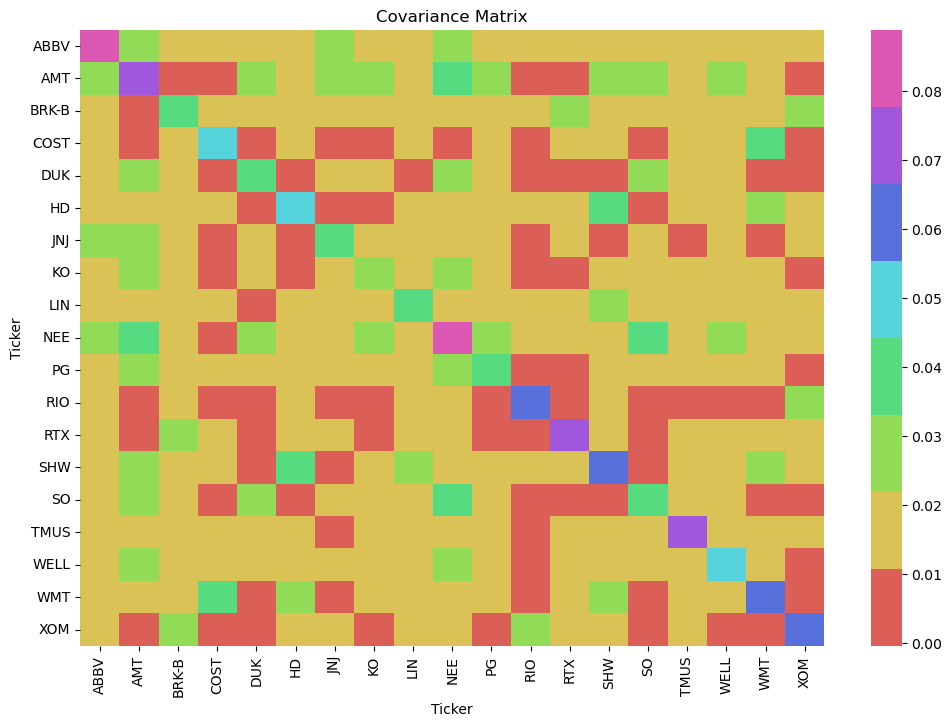

In [8]:
# Create a heatmap to visualize the covariance matrix
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix_new, annot=False, cmap=sns.color_palette("hls", 8), fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()

From the above 19 stocks, we now select 10 stocks to form our portfolio. To do this, we visually inspect the heatmap to determine the stocks that collectively produce the lowest covariances. We want those stocks that produce the smallest number of low covariances.

In [21]:
# From the heat map, we select the 10 stocks that produced the lowest number of low covariances
#tickers_new = ['ABBV' (0), 'AMT' (5), 'BRK-B' (1), 'COST' (8), 'DUK' (8), 'HD' (4), 'JNJ' (6), 'KO' (5), 'LIN' (1),
               #'NEE' (1), 'PG' (3), 'RIO' (11), 'RTX' (6), 'SHW' (3), 'SO' (7), 'TMUS' (2), 'WELL' (2), 'WMT' (5), 'XOM' (8)]

tickers_new = ['AMT', 'COST', 'DUK', 'JNJ', 'KO', 'RIO', 'RTX', 'SO', 'WMT', 'XOM']

# Create a new dataframe with only the above stocks
stock_new = yf.download(tickers_new, start=start_date, end=end_date)

[*********************100%***********************]  10 of 10 completed


In [22]:
# Calculate the daily returns
daily_returns_new = np.log(stock_new['Close']/stock_new['Close'].shift(1))
daily_returns_new = daily_returns_new.dropna()

# Calculate the covariance matrix
covariance_matrix_new = 252*((daily_returns_new).cov())

# Show the covariance matrix
covariance_matrix_new

Ticker,AMT,COST,DUK,JNJ,KO,RIO,RTX,SO,WMT,XOM
Ticker,,,,,,,,,,
AMT,0.077188,0.006469,0.032373,0.023139,0.025152,0.005404,0.007432,0.033460,0.013164,0.006604
COST,0.006469,0.048682,0.005010,0.005355,0.009531,0.009128,0.014172,0.004442,0.033589,0.007925
DUK,0.032373,0.005010,0.033833,0.018267,0.018669,-0.000191,0.009471,0.029319,0.008819,0.007210
JNJ,0.023139,0.005355,0.018267,0.035991,0.016455,0.004401,0.011011,0.018880,0.007517,0.011957
KO,0.025152,0.009531,0.018669,0.016455,0.029116,0.005216,0.007849,0.019917,0.012698,0.008767
RIO,0.005404,0.009128,-0.000191,0.004401,0.005216,0.060705,0.010586,0.003233,0.009181,0.025029
RTX,0.007432,0.014172,0.009471,0.011011,0.007849,0.010586,0.070525,0.008903,0.015495,0.019568
SO,0.033460,0.004442,0.029319,0.018880,0.019917,0.003233,0.008903,0.036275,0.010184,0.009463
WMT,0.013164,0.033589,0.008819,0.007517,0.012698,0.009181,0.015495,0.010184,0.057557,0.009133


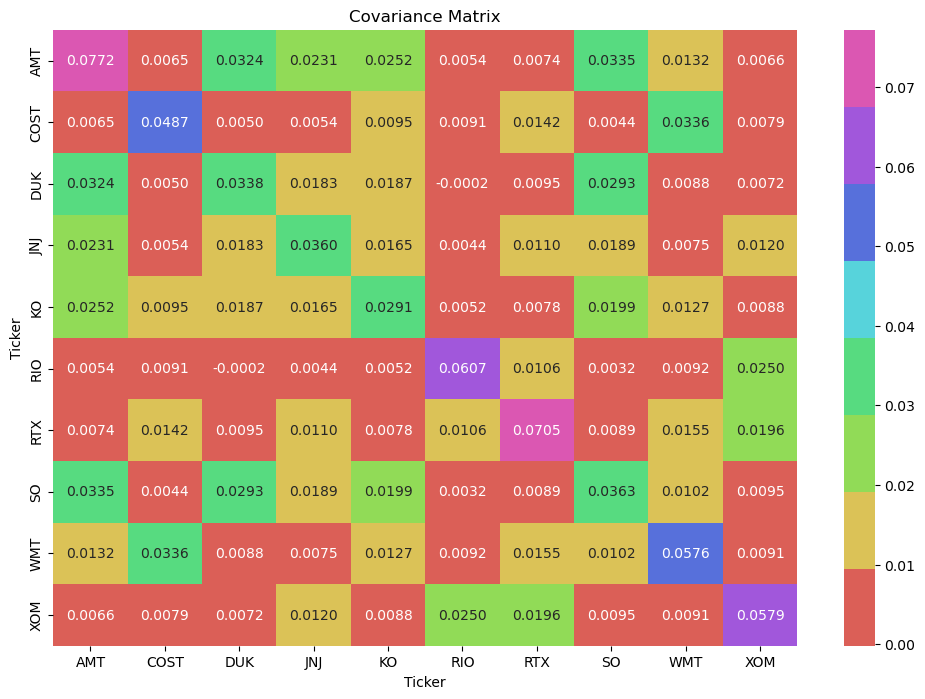

In [23]:
# Create a heatmap to visualize the covariance matrix
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix_new, annot=True, cmap=sns.color_palette("hls", 8), fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()

## Weight Selection ##

We now impose the following conditions to determine the weights of each stock in our portfolio:
- We want to invest at least 5% of capital in each index.
- We want to invest no more than 20% of capital in each index.
- We want to create the portfolio with the lowest risk given these constraints.

The function $w$ &rarr; $w^T$ Cov(X<sub>1</sub>, ..., X<sub>10</sub>) $w$ is convex in $w$, so it can be minimized subject to constraints.

In [25]:
# Number of assets
n_assets = len(tickers_new)

# Define an initial guess for asset weights (e.g., equal weights)
initial_weights = np.array([1/n_assets] * n_assets)

# Define weight constraints
# Sum of weights equals 1
# Allocate at least 5% of capital into each index
# Do not allocate more than 20% of capital into each index
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1}, # sum(weights) - 1 = 0
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.05}, # min(weights) - 0.05 >= 0
              {'type': 'ineq', 'fun': lambda weights: .2-max(weights)}) # 0.2-max(weights) >= 0

# Define the objective function to minimize portfolio variance
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix_new, weights)))
    return portfolio_std_dev

# Run the optimization to find the optimal weights
result = minimize(portfolio_volatility, initial_weights, constraints=constraints)

# Optimal asset weights
optimal_weights = result.x
optimal_vol = result.fun

# Print the weights and volatility
print("Asset Weights to Minimize Volatility:")
for ticker, weight in zip(tickers_new, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")
    
#Print estimated optimal volatility subject to the constraints
print(f'The optimal volatility subject to the constraints is {result.fun}')

Asset Weights to Minimize Volatility:
AMT: Weight = 0.0500
COST: Weight = 0.0754
DUK: Weight = 0.1644
JNJ: Weight = 0.1475
KO: Weight = 0.1662
RIO: Weight = 0.0662
RTX: Weight = 0.1205
SO: Weight = 0.0500
WMT: Weight = 0.0501
XOM: Weight = 0.1097
The optimal volatility subject to the constraints is 0.1281080755643961


The above list gives our low risk profile. Our portfolio consists of the stocks on the left, and the proportions of each stock in the portfolio are given by the weights.